# SWAG-P Simulation with Gap Plasmon Explorer

#### GP Explorer is a handly tools allowing to manipulate GP geometries and visualize its reflectance under differents configurations. 
#### Then, GP influence on reflectance from red-shift to Fano profils can be studying without programming skills.

To begin, remember that a GP<sup><a href="#note1">[1]</a></sup> -a guided electromagnetic wave into dielectric-, must be undertand as a mode of the nano cavity -the so called "gap"- between two close metallic regions. As it confines light more than surface plasmon, GPs are even more sensible to non-locality influence. GPs depends obviously on spaces fields variations, the currents density generalized into non local form shows how conductivities becomes a space respons function describing how the surrounding fields influence currents at any points. Consequencies is the space broadening of the electromagnetic fields. In others words, at path means free scale of electrons, the fields scattering reduces the field intensities into the nano-gap. Then taking into account non locality, a blue-shift can be observed. But for now, non locality phenomenom will be neglect in aid of much easier functions as Brendel Bormann discuss later in the document. la fonction BrendelBormann_Faddeeva utilise la fonction faddeeva pour calculer la correction non locale à la permittivité.





<p id="note1"><b>[1]</b> A solution of Maxwell's equations without source.</p>

In the next cell, we will set up the environment by importing necessary modules and defining paths to required data files ensuring that all dependencies are correctly loaded and accessible for subsequent computations.

In [34]:
import sys, os
# Add the path to the modules folder containing functiions and material data.
module_path = os.path.abspath(os.path.join('/home/chardon-grossard/Bureau/SWAG-P/Gap_Plasmon_2D/Workspace/', 'modules'))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
import matplotlib.pyplot as plt

In [35]:
# Définir le chemin relatif vers le fichier JSON (en supposant que le dossier 'data' se trouve au même niveau que 'modules')
json_path = os.path.abspath(os.path.join('/home/chardon-grossard/Bureau/SWAG-P/Gap_Plasmon_2D/Workspace/', 'data', 'material_data.json'))

print("Chemin vers le fichier JSON :", json_path)

# Exemple d'utilisation avec get_n_k
from Functions_ExpData import get_n_k # importe fonctions pour récup n et k

Chemin vers le fichier JSON : /home/chardon-grossard/Bureau/SWAG-P/Gap_Plasmon_2D/Workspace/data/material_data.json


#### Indice et extinction du substrat


In [36]:
material_test = "BK7"
lambda_test = 800  # en nm

# récupérer n et k
n_val, k_val = get_n_k(material_test, lambda_test, json_path)

perm_sub = (n_val + 1j * k_val) ** 2

print(f"For {material_test} at {lambda_test} nm: n = {n_val:.6f}, k = {k_val:.6f}")

For BK7 at 800 nm: n = 1.510797, k = 0.000000


Approximation numérique: La fonction faddeeva utilise une méthode spectrale basée sur une transformée de Fourier rapide (FFT) pour approximer la fonction Faddeeva. Le paramètre N détermine le nombre de termes dans cette approximation.
Précision: Un N plus grand signifie que plus de termes sont utilisés dans l'approximation, ce qui améliore la précision du calcul de la fonction Faddeeva.
Performance: Un N plus grand augmente également le temps de calcul, donc il y a un compromis entre précision et performance.

In [37]:
from Brendel_Bormann_Faddeeva import BrendelBormann_Faddeeva
from MaterialsLoader import load_materials, get_material_params
import numpy as np
import matplotlib.pyplot as plt

# Charger le fichier JSON des matériaux
materials_data = load_materials()

N = 64  # Paramètre numérique pour la fonction Faddeeva

# Sélection du matériau (ici "Ag" pour l'argent, modifiez selon vos besoins)
selected_material = "Ag"
f0, omega_p, Gamma0, f, omega, gamma, sigma = get_material_params(selected_material, materials_data)

# Définir la plage de longueurs d'onde en nm
lambda_range = np.linspace(300, 1000, 100)
epsilon_selected = np.empty(lambda_range.shape, dtype=complex)

# Calcul de la permittivité pour chaque longueur d'onde
for idx, wavelength in enumerate(lambda_range):
    epsilon_selected[idx] = BrendelBormann_Faddeeva(wavelength, f0, omega_p, Gamma0, f, omega, gamma, sigma, N)


ImportError: cannot import name 'BrendelBormann_Faddeeva' from 'Brendel_Bormann_Faddeeva' (/home/chardon-grossard/Bureau/SWAG-P/Gap_Plasmon_2D/Workspace/modules/Brendel_Bormann_Faddeeva.py)

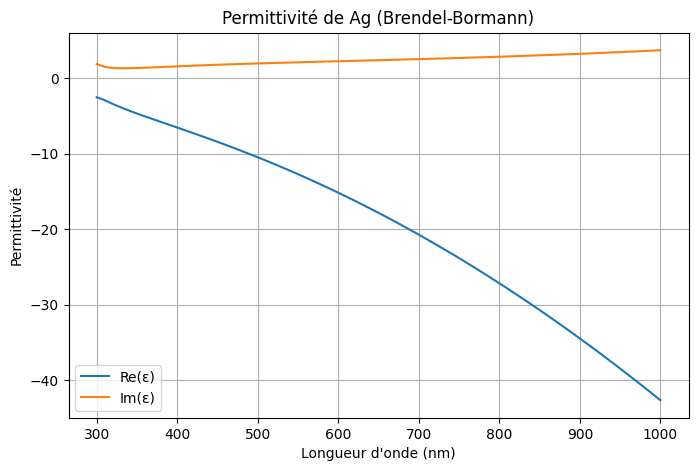

In [ ]:
# Tracé du résultat
plt.figure(figsize=(8, 5))
plt.plot(lambda_range, np.real(epsilon_selected), label="Re(ε)")
plt.plot(lambda_range, np.imag(epsilon_selected), label="Im(ε)")
plt.xlabel("Longueur d'onde (nm)")
plt.ylabel("Permittivité")
plt.title(f"Permittivité de {selected_material} (Brendel-Bormann)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Charger les paramètres pour les matériaux Ag, Au, Cr, Al et Ni
f0_Ag, omega_p_Ag, Gamma0_Ag, f_Ag, omega_Ag, gamma_Ag, sigma_Ag = get_material_params("Ag", materials_data)
f0_Au, omega_p_Au, Gamma0_Au, f_Au, omega_Au, gamma_Au, sigma_Au = get_material_params("Au", materials_data)
f0_Cr, omega_p_Cr, Gamma0_Cr, f_Cr, omega_Cr, gamma_Cr, sigma_Cr = get_material_params("Cr", materials_data)
f0_Al, omega_p_Al, Gamma0_Al, f_Al, omega_Al, gamma_Al, sigma_Al = get_material_params("Al", materials_data)
f0_Ni, omega_p_Ni, Gamma0_Ni, f_Ni, omega_Ni, gamma_Ni, sigma_Ni = get_material_params("Ni", materials_data)


In [ ]:
# Paramètres fixes pour la structure SWAG
geometry = {
    "thick_super": 200,
    "width_reso": 30,
    "thick_reso": 30,
    "thick_gap": 3,
    "thick_func": 1,
    "thick_mol": 2,
    "thick_metalliclayer": 10,
    "thick_sub": 200,
    "thick_accroche": 1,
    "period": 100.2153
}
angle = 0                   # Incidence normale
polarization = 1            # 1 pour TM, 0 pour TE

perm_env = 1.0              # Air
perm_dielec = 1.45 ** 2

In [ ]:
# Préparer le dictionnaire de matériaux (les valeurs pour Ag et Au seront calculées pour chaque wavelength)
materials = {
    "perm_env": perm_env,
    "perm_dielec": perm_dielec,
    "perm_sub": perm_sub,
    "perm_reso": None,            # sera mis à jour avec Ag
    "perm_metalliclayer": None,   # sera mis à jour avec Au
    "perm_accroche": None         # sera mis à jour avec Cr
}

# Initialiser le dictionnaire d'onde
wave = {"wavelength": None, "angle": angle, "polarization": polarization}
n_mod = 50

# Listes pour stocker les résultats de réflectance
Rup_values = []
Rdown_values = []


## RCWA 
S-matrix from T & U scattering matrix for bi optics slabs. Blablabla

In [ ]:
from Functions_RCWA import cascade, c_bas, c_haut, intermediaire, couche, step, grating, homogene, interface, HErmes
from Function_reflectance_SWAG import reflectance

for wavelength in lambda_range:
    # Calculer les permittivités pour chaque matériau avec la fonction BrendelBormann_Faddeeva
    perm_Ag = BrendelBormann_Faddeeva(wavelength, f0_Ag, omega_p_Ag, Gamma0_Ag, f_Ag, omega_Ag, gamma_Ag, sigma_Ag, N)
    perm_Au = BrendelBormann_Faddeeva(wavelength, f0_Au, omega_p_Au, Gamma0_Au, f_Au, omega_Au, gamma_Au, sigma_Au, N)
    perm_Cr = BrendelBormann_Faddeeva(wavelength ,  f0_Cr, omega_p_Cr, Gamma0_Cr, f_Cr, omega_Cr, gamma_Cr, sigma_Cr, N)

    # Mise à jour du dictionnaire des matériaux
    materials["perm_reso"] = perm_Ag
    materials["perm_metalliclayer"] = perm_Au
    materials["perm_accroche"] = perm_Cr 
    
    # Mise à jour de la longueur d'onde dans le dictionnaire d'onde
    wave["wavelength"] = wavelength
        # Calcul de la réflectance via votre fonction reflectance du module SWAG
    Rup, Rdown = reflectance(geometry, wave, materials, n_mod)
    
    Rup_values.append(Rup)
    Rdown_values.append(Rdown)


print("Réflectance R_up :", Rup)
print("Réflectance R_down :", Rdown)

Réflectance R_up : 0.6272567285079019
Réflectance R_down : 0.6068800501439278


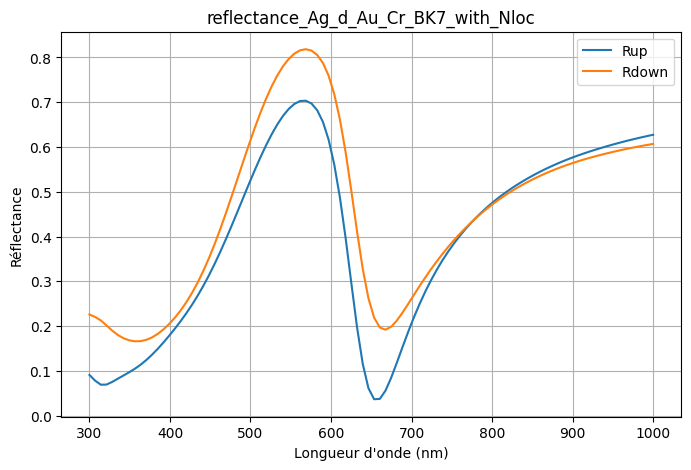

In [ ]:
# Tracé des résultats
plt.figure(figsize=(8, 5))
plt.plot(lambda_range, Rup_values, label="Rup")
plt.plot(lambda_range, Rdown_values, label="Rdown")
plt.xlabel("Longueur d'onde (nm)")
plt.ylabel("Réflectance")
plt.title("reflectance_Ag_d_Au_Cr_BK7_with_Nloc")
plt.legend()
plt.grid()
plt.savefig("reflectance_MIM_Ag_dié_Au_Cr_BK7_with_Nloc.png")
plt.show()